In [1]:
#imports
#numpy, pandas, scipy, math, matplotlib

In [2]:
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt

In [3]:
#estimators
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model

In [4]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [5]:
#cross validation
from sklearn.cross_validation import train_test_split

C:\Users\mkelly\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [10]:
#data
rawData = pd.read_csv("C:/Users/mkelly/Desktop/C5T3/creditData.csv", header = 0)

#save this one for classification
#rawData['default payment next month'] = rawData['default payment next month'].astype('category')

In [11]:
rawData.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_STD,PAY_STD,BILL_AVG,PAY_AVG,BILL_PAY_DIFF_1,BILL_PAY_DIFF_2,BILL_PAY_DIFF_3,BILL_PAY_DIFF_4,BILL_PAY_DIFF_5,BILL_PAY_DIFF_6
0,1,20000,2,2,1,24,2,2,-1,-1,...,1608.143754,256.775139,1284.000000,114.833333,3913,2413,689,0,0,0
1,2,120000,2,2,2,26,-1,2,0,0,...,582.382296,687.184271,2846.166667,833.333333,2682,725,1682,2272,3455,1261
2,3,90000,2,2,2,34,0,0,0,0,...,5536.122723,1433.038923,16942.166670,1836.333333,27721,12527,12559,13331,13948,10549
3,4,50000,2,2,1,37,0,0,0,0,...,9645.205746,436.405393,38555.666670,1398.000000,44990,46214,48091,27214,27890,28547
4,5,50000,1,2,1,57,-1,0,-1,0,...,9739.045734,12585.049260,18223.166670,9841.500000,6617,-31011,25835,11940,18457,18452


In [14]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28742 entries, 0 to 28741
Data columns (total 48 columns):
ID                            28742 non-null int64
LIMIT_BAL                     28742 non-null int64
SEX                           28742 non-null category
EDUCATION                     28742 non-null int64
MARRIAGE                      28742 non-null int64
AGE                           28742 non-null int64
PAY_1                         28742 non-null int64
PAY_2                         28742 non-null int64
PAY_3                         28742 non-null int64
PAY_4                         28742 non-null int64
PAY_5                         28742 non-null int64
PAY_6                         28742 non-null int64
BILL_AMT1                     28742 non-null int64
BILL_AMT2                     28742 non-null int64
BILL_AMT3                     28742 non-null int64
BILL_AMT4                     28742 non-null int64
BILL_AMT5                     28742 non-null int64
BILL_AMT6            

In [ ]:
#categorical transformation

In [15]:
rawData['SEX'] = rawData['SEX'].astype('category')
rawData['EDUCATION'] = rawData['EDUCATION'].astype('category')
rawData['MARRIAGE'] = rawData['MARRIAGE'].astype('category')
rawData['AgeBins7'] = rawData['AgeBins7'].astype('category')
rawData['TRENDING'] = rawData['TRENDING'].astype('category')
rawData['EXCEED_LIMIT'] = rawData['EXCEED_LIMIT'].astype('category')
rawData['EXCEED_DEFAULT_AGREEMENT'] = rawData['EXCEED_DEFAULT_AGREEMENT'].astype('category')

In [16]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28742 entries, 0 to 28741
Data columns (total 48 columns):
ID                            28742 non-null int64
LIMIT_BAL                     28742 non-null int64
SEX                           28742 non-null category
EDUCATION                     28742 non-null category
MARRIAGE                      28742 non-null category
AGE                           28742 non-null int64
PAY_1                         28742 non-null int64
PAY_2                         28742 non-null int64
PAY_3                         28742 non-null int64
PAY_4                         28742 non-null int64
PAY_5                         28742 non-null int64
PAY_6                         28742 non-null int64
BILL_AMT1                     28742 non-null int64
BILL_AMT2                     28742 non-null int64
BILL_AMT3                     28742 non-null int64
BILL_AMT4                     28742 non-null int64
BILL_AMT5                     28742 non-null int64
BILL_AMT6      

In [17]:
#selecting variables

In [20]:
del rawData['ID']

In [21]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28742 entries, 0 to 28741
Data columns (total 47 columns):
LIMIT_BAL                     28742 non-null int64
SEX                           28742 non-null category
EDUCATION                     28742 non-null category
MARRIAGE                      28742 non-null category
AGE                           28742 non-null int64
PAY_1                         28742 non-null int64
PAY_2                         28742 non-null int64
PAY_3                         28742 non-null int64
PAY_4                         28742 non-null int64
PAY_5                         28742 non-null int64
PAY_6                         28742 non-null int64
BILL_AMT1                     28742 non-null int64
BILL_AMT2                     28742 non-null int64
BILL_AMT3                     28742 non-null int64
BILL_AMT4                     28742 non-null int64
BILL_AMT5                     28742 non-null int64
BILL_AMT6                     28742 non-null int64
PAY_AMT1       

In [ ]:
#feature selections

In [23]:
EDUCATION = rawData.iloc[:,3]

In [24]:
print(EDUCATION)

0        1
1        2
2        2
3        1
4        1
5        2
6        2
7        2
8        1
9        2
10       2
11       2
12       2
13       2
14       2
15       3
16       2
17       1
18       2
19       1
20       2
21       1
22       2
23       2
24       2
25       2
26       1
27       2
28       2
29       2
        ..
28712    1
28713    2
28714    1
28715    1
28716    1
28717    1
28718    1
28719    1
28720    2
28721    2
28722    1
28723    2
28724    1
28725    1
28726    1
28727    2
28728    2
28729    2
28730    1
28731    2
28732    1
28733    1
28734    1
28735    2
28736    2
28737    1
28738    2
28739    2
28740    1
28741    1
Name: MARRIAGE, Length: 28742, dtype: category
Categories (3, int64): [1, 2, 3]


In [27]:
features = rawData.iloc[:,1:23]

In [26]:
print('Summary of feature sample')
features.head()

Summary of feature sample


,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,2,2,1,24,2,2,-1,-1,-2,-2,...,689,0,0,0,0,689,0,0,0,0
1,2,2,2,26,-1,2,0,0,0,2,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,2,2,2,34,0,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,2,2,1,37,0,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,1,2,1,57,-1,0,-1,0,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [28]:
print('Summary of feature sample')
features.head()

Summary of feature sample


,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,2,2,1,24,2,2,-1,-1,-2,-2,...,689,0,0,0,0,689,0,0,0,0
1,2,2,2,26,-1,2,0,0,0,2,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,2,2,2,34,0,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,2,2,1,37,0,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,1,2,1,57,-1,0,-1,0,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [29]:
#depvariable
depVar = rawData['default payment next month']

In [30]:
depVar.head()

0    1
1    1
2    0
3    0
4    0
Name: default payment next month, dtype: int64

In [31]:
#train set features (x)

X_train = (features[:-20120])

In [32]:
x_train.head()

NameError: name 'x_train' is not defined

In [33]:
X_train.head()

,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,2,2,1,24,2,2,-1,-1,-2,-2,...,689,0,0,0,0,689,0,0,0,0
1,2,2,2,26,-1,2,0,0,0,2,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,2,2,2,34,0,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,2,2,1,37,0,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,1,2,1,57,-1,0,-1,0,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [34]:
#train for dependent, needs to be same number of rows as X set
y_train = (depVar[:-20120])

In [35]:
y_train_count = len(y_train.index)
print('The number of observations in the Y training set are:' ,str(y_train_count))

The number of observations in the Y training set are: 8622


In [36]:
y_train.head()

0    1
1    1
2    0
3    0
4    0
Name: default payment next month, dtype: int64

In [37]:
#testing sets for feature set and dependent variables
x_test = features[-11622:]

In [38]:
x_test_count = len(x_test.index)
print('The number of observations in the X test set is:' , str(x_test_count))

The number of observations in the X test set is: 11622


In [39]:
print(x_test.head())

      SEX EDUCATION MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6  \
17120   1         2        1   25     -1     -1     -1     -1     -1     -2   
17121   1         2        2   25      0      0      0      0      0      0   
17122   1         3        2   26      0      0      0      0      0      0   
17123   1         2        2   24      2      2      2      2      2      2   
17124   1         3        2   25      0      0      0      0      0      0   

         ...     BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  \
17120    ...           101        480          0          0         0   
17121    ...         15737      16603      17395      17182      1600   
17122    ...         76228      76841       9534       7371      3694   
17123    ...        104878     105325     102220     107970      5500   
17124    ...         25407      27312       8810       6355      2000   

       PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  
17120       281       600   

In [40]:
#establish ground truth
y_test = depVar[-11622:]

In [41]:
y_test_count = len(y_test.index)
print('the number of y test is blablah blah this much', str(y_test_count))

the number of y test is blablah blah this much 11622


In [42]:
y_test.head()

17120    0
17121    0
17122    1
17123    1
17124    0
Name: default payment next month, dtype: int64

In [43]:
print(y_test.head())

17120    0
17121    0
17122    1
17123    1
17124    0
Name: default payment next month, dtype: int64


In [45]:
from sklearn.cross_validation import train_test_split

In [47]:
X_train, x_test, y_train, y_test = train_test_split(X_train, y_train)

In [49]:
x_train.shape()

NameError: name 'x_train' is not defined

In [50]:
x.train.shape, x_test.shape

NameError: name 'x' is not defined

In [51]:
x_train.shape, x_test.shape

NameError: name 'x_train' is not defined

In [52]:
X_train.shape, x_test.shape

((6466, 22), (2156, 22))

In [53]:
#estimator objects from sklearn

In [54]:
from sklearn

SyntaxError: invalid syntax (<ipython-input-54-9bacd0769f04>, line 1)

In [55]:
from sklearn.linear_model import LinearRegression

In [56]:
model = LinearRegression(n_jobs=10)

In [57]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model

In [58]:
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt

In [59]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [60]:
from sklearn.cross_validation import train_test_split

In [61]:
#models
modelSVR = SVR()
modelRF = RandomForestRegressor()
modelLR = LinearRegression()

In [62]:
#features
features = rawData.iloc[:, 12:23]

In [64]:
print('summary of feature sample')
features.head()

summary of feature sample


,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,3102,689,0,0,0,0,689,0,0,0,0
1,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [65]:
print(depVar)

0        1
1        1
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       1
14       0
15       0
16       1
17       0
18       0
19       1
20       1
21       1
22       0
23       0
24       1
25       0
26       0
27       0
28       0
29       1
        ..
28712    0
28713    0
28714    0
28715    0
28716    0
28717    0
28718    1
28719    0
28720    1
28721    0
28722    0
28723    0
28724    0
28725    1
28726    0
28727    0
28728    0
28729    0
28730    0
28731    0
28732    0
28733    1
28734    0
28735    0
28736    1
28737    0
28738    0
28739    1
28740    1
28741    1
Name: default payment next month, Length: 28742, dtype: int64


In [66]:
modelRF.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [67]:
modelSVR.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [68]:
modelLR.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [ ]:
#obtain training scores

In [69]:
print(cross_val_score(modelRF, X_train, y_train))

[0.04916562 0.06770986 0.05231961]


In [70]:
#1st value is score array for test scores on each cv split.  higher means better model, 
#2nd value is the tiem for fitting the estimator on the train set for each cv split,
#3rd value is the time for scoring the estimaor on the test set for each cv split. 

print(cross_val_score(modelLR, X_train, y_train))

[0.098635   0.10695283 0.11542997]


In [72]:
print(cross_val_score(modelSVR, X_train, y_train))

[-0.01827649 -0.00742319 -0.02508547]


In [74]:
modelRF.score(X_train, y_train)

0.8338276777113737

In [75]:
#r squared is .834 for RF

In [76]:
modelSVR.score(X_train, y_train)

0.9412868040849289

In [77]:
#r squared for SVR is .941

In [78]:
modelLR.score(X_train, y_train)

0.11721155822100171

In [79]:
#r squared for regression is .12

In [80]:
#making predictions.  i select RF to do so...

In [81]:
predictions = modelRF.predict(x_test)

In [82]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [83]:
from math import sqrt

In [84]:
#create a function for calculating rmse
rmse = sqrt(mean_squared_error(y_test, predictions))

In [86]:
predRsquared = r2_score(y_test, predictions)

In [87]:
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: 0.063
RMSE: 0.398


In [88]:
#r2 = .063
#RMSE = .398
#this is not very good. 

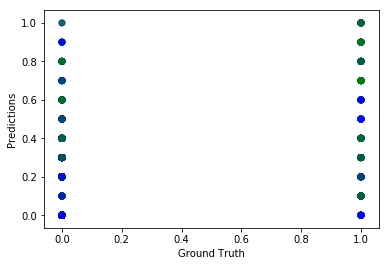

In [89]:
plt.scatter(y_test, predictions, color=['blue', 'green'], alpha=0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show()